# Spotify Collaborations Extended EDA - Aseel's Part 

### Initial Set Up

#### Importing Packages

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [8]:
top_us = pd.read_csv("./data/spotify_us_all_fe.csv")
top_us.head()

,Unnamed: 0,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,...,Artist_first_onchart,Artist_cumu_songs,Artist_cumu_collab,Artist_cumu_solo,Artist_days_onchart,Collab_avg_days_onchart,Collab_avg_cumu_songs,Collab_avg_cumu_collab,Collab_avg_cumu_solo,Profit
0,0,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Hearts & Colors,1,2,['viral pop'],04CttTezSnv71USiiG9mIo,...,2017-01-01,1,1,0,1,1.0,1.000000,1.000000,0.0,496.26499
1,1,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,...,2017-01-01,1,1,0,1,1.0,1.000000,1.000000,0.0,496.26499
2,2,2017-01-01,In the Name of Love,435945.0,27.0,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,...,2017-01-01,1,1,0,1,1.0,2.000000,1.500000,0.5,1442.97795
3,3,2017-01-01,In the Name of Love,435945.0,27.0,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,...,2017-01-01,3,2,1,1,1.0,2.000000,1.500000,0.5,1442.97795
4,4,2017-01-01,Party,151474.0,178.0,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,...,2017-01-01,1,1,0,1,1.0,1.666667,1.666667,0.0,501.37894


#### Basic Information For Each Column

In [9]:
top_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454322 entries, 0 to 454321
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               454322 non-null  int64  
 1   Date                     454322 non-null  object 
 2   Track Name               454306 non-null  object 
 3   Streams                  454322 non-null  float64
 4   Position                 454322 non-null  float64
 5   Artist Name              454306 non-null  object 
 6   Artist No.               454322 non-null  int64  
 7   No. of Artists           454322 non-null  int64  
 8   Artist Genre             454322 non-null  object 
 9   Track URI                454322 non-null  object 
 10  Country                  454322 non-null  object 
 11  Artist URI               454322 non-null  object 
 12  Album URI                454322 non-null  object 
 13  Album_release_month      454322 non-null  int64  
 14  Albu

### Chart C: Relationship between streams and position 

Text(0.5, 1.0, 'Chart C')

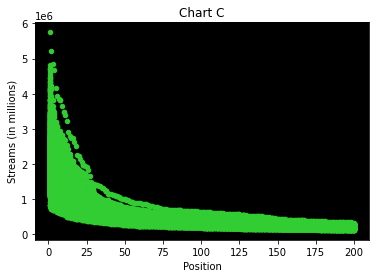

In [135]:
# Relationship between streams and position
# No need to group by position b/c it is scatter graph for all track in each day. Correct me if I'm wrong
g1 = (
    top_us
    .plot.scatter(x="Position", y="Streams", color='limegreen')
)
g1.set_xlabel("Position")
g1.set_ylabel("Streams (in millions)")
g1.set_facecolor('black')
g1.set_title("Chart C")

### Chart D: Relationship between profits and position 

Text(0.5, 1.0, 'Chart D')

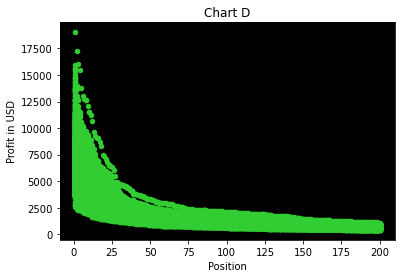

In [136]:
# Relationship between profits and position
# No need to group by position b/c it is scatter graph for all track in each day. Correct me if I'm wrong
g2 = (
    top_us
    .plot.scatter(x="Position", y="Profit", color='limegreen')
)
g2.set_xlabel("Position")
g2.set_ylabel("Profit in USD") # what is the unit of profit here? Thousands USD? 
g2.set_facecolor('black')
g2.set_title("Chart D")

### Chart A-1: Relationship between no. of collaborators and success (Position)

Text(0.5, 1.0, 'Average Song Position and Number of Collaborators')

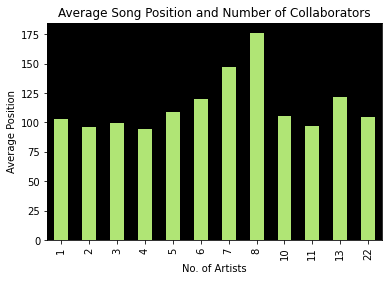

In [138]:
# the genres will be included in the dash application (Jonathan)
#Relationship between no. of collaborators and success (Position)
g3 = (
    top_us.groupby(["No. of Artists"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Position", color = '#b0e575')
)
g3.set_facecolor('black')
g3.get_legend().remove()
g3.set_xlabel("No. of Artists")
g3.set_ylabel("Average Position")
g3.set_title("Average Song Position and Number of Collaborators")

### Chart A-2: Relationship between no. of collaborators and success (Streams)

Text(0.5, 1.0, 'Average streams and Number of Collaborators')

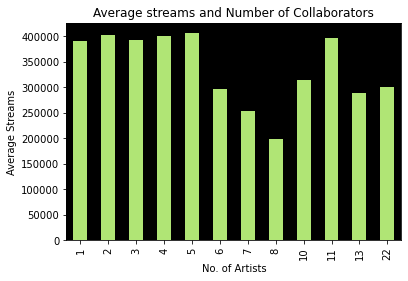

In [139]:
#Relationship between no. of collaborators and success (Streams)
g4 = (
    top_us.groupby(["No. of Artists"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Streams", color = '#b0e575')
)
g4.set_facecolor('black')
g4.get_legend().remove()
g4.set_xlabel("No. of Artists")
g4.set_ylabel("Average Streams")
g4.set_title("Average streams and Number of Collaborators")

### Chart A-3: Relationship between no. of collaborators and success (Profit)

Text(0.5, 1.0, 'Average Profit and Number of Collaborators')

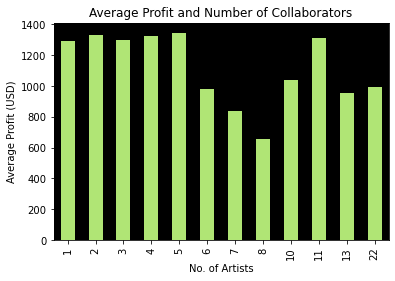

In [142]:
#Relationship between no. of collaborators and success (Profit)
g5 = (
    top_us.groupby(["No. of Artists"])["Profit"]
    .mean()
    .reset_index(name="Profit")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Profit", color = '#b0e575')
)
g5.set_facecolor('black')
g5.get_legend().remove()
g5.set_xlabel("No. of Artists")
g5.set_ylabel("Average Profit (USD)")
g5.set_title("Average Profit and Number of Collaborators")

### Exploring relationship between no. of collaborators and success by Artist Genre - Additional EDA

In [143]:
# Cleaning Genre column
top_us_genre = top_us[["Artist Name", "Artist Genre", "No. of Artists", "Position", "Streams", "Profit"]].copy()

top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre'].apply(lambda x: x.replace('[', ''))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.replace(']', ''))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.replace("'", ''))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.replace(', ', ','))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.split(','))

top_us_genre = top_us_genre.explode('Artist Genre Clean')
# drop the unclean genre column and rename the clean column
top_us_genre.drop(columns=["Artist Genre"],  inplace = True)
top_us_genre.rename(columns = {"Artist Genre Clean": "Artist Genre"},  inplace = True) 


In [125]:
# finding top 5 genres for songs ranked in the first 10 positions
top_10_positions = top_us_genre[top_us_genre['Position']<= 10]

top_10_positions = (
    top_10_positions.groupby(["Artist Genre"])["Position"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending= False)
    .head(5)
)
top_10_positions = top_10_positions.set_index('Artist Genre')
top_10_positions

,Count
Artist Genre,
rap,13417
pop rap,7946
trap,7071
pop,6494
hip hop,5990


In [127]:
#subseting for the top 5 genres
top_5_genres= ["rap", "pop rap", "trap", "pop", "hip hop"]
top_us_5_genres= top_us_genre[top_us_genre['Artist Genre'].isin(top_5_genres)] 
top_us_5_genres

,Artist Name,No. of Artists,Position,Streams,Profit,Artist Genre
2,Martin Garrix,2,27.0,435945.0,1442.97795,pop
3,Bebe Rexha,2,27.0,435945.0,1442.97795,pop
4,Chris Brown,3,178.0,151474.0,501.37894,pop
4,Chris Brown,3,178.0,151474.0,501.37894,pop rap
4,Chris Brown,3,178.0,151474.0,501.37894,rap
...,...,...,...,...,...,...
454320,Playboi Carti,2,182.0,230435.0,762.73985,rap
454320,Playboi Carti,2,182.0,230435.0,762.73985,trap
454321,Kid Cudi,2,182.0,230435.0,762.73985,hip hop
454321,Kid Cudi,2,182.0,230435.0,762.73985,pop rap


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


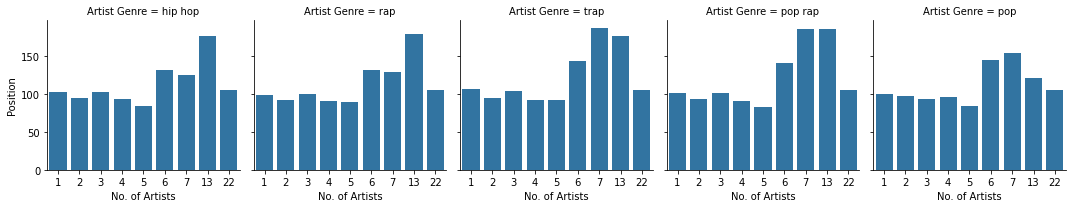

In [128]:
# Aseel's Chart A-1
# Relationship between no. of collaborators and success (Position)
top_us_5_genres_grouped_pos = (
    top_us_5_genres.groupby(["Artist Genre","No. of Artists"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="No. of Artists", ascending= True)
)
a = sns.FacetGrid(top_us_5_genres_grouped_pos, col="Artist Genre")
g.map(sns.barplot,'No. of Artists','Position')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


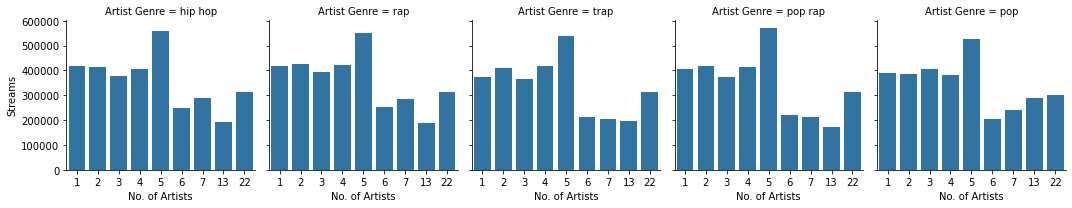

In [120]:
# Aseel's Chart A-2
# Relationship between no. of collaborators and success (Streams)
top_us_5_genres_grouped_str = (
    top_us_5_genres.groupby(["Artist Genre","No. of Artists"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="No. of Artists", ascending= True)
)
a_2 = sns.FacetGrid(top_us_5_genres_grouped_str, col="Artist Genre")
a_2.map(sns.barplot,'No. of Artists','Streams')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


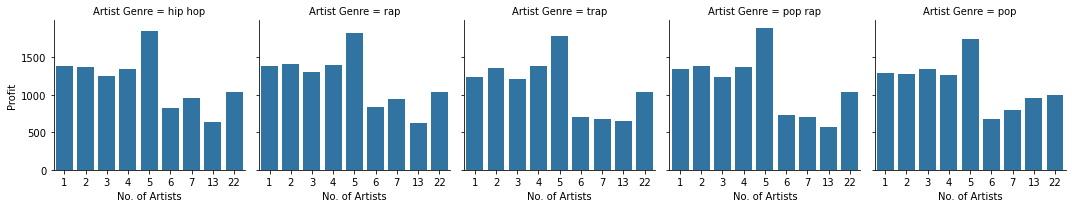

In [121]:
# Aseel's Chart A-3
# Relationship between no. of collaborators and success (Profit)
top_us_5_genres_grouped_pro = (
    top_us_5_genres.groupby(["Artist Genre","No. of Artists"])["Profit"]
    .mean()
    .reset_index(name="Profit")
    .sort_values(by="No. of Artists", ascending= True)
)
a_3 = sns.FacetGrid(top_us_5_genres_grouped_pro, col="Artist Genre")
a_3.map(sns.barplot,'No. of Artists','Profit')